# Histogram Transformation

In [1]:
# Importing relevant packages and doing necessary setup
import cv2
import matplotlib.pyplot as plt
import matplotlib
import PIL
import numpy as np

%matplotlib inline

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [5]:
# Helper function to display multiple images in a plot
def display_images(images, rows, cols, size, title, subtitles):
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c], cmap = 'gray', vmin = 0, vmax = 255)
            ax1.set_title(subtitles[c], fontsize = 20)
            c = c + 1
    plt.show()

### Part 1

In [6]:
# Helper function required to solve this part
def histEqualization(im, L):
    sz = (im.shape[0] * im.shape[1])
    cum_prob = np.zeros(256)
    for i in range(256):
        cum_prob[i] = sum(sum((im <= i))) * 1.0 / sz
    img = np.round((L - 1) * cum_prob[im])
    return img.astype(np.uint8)

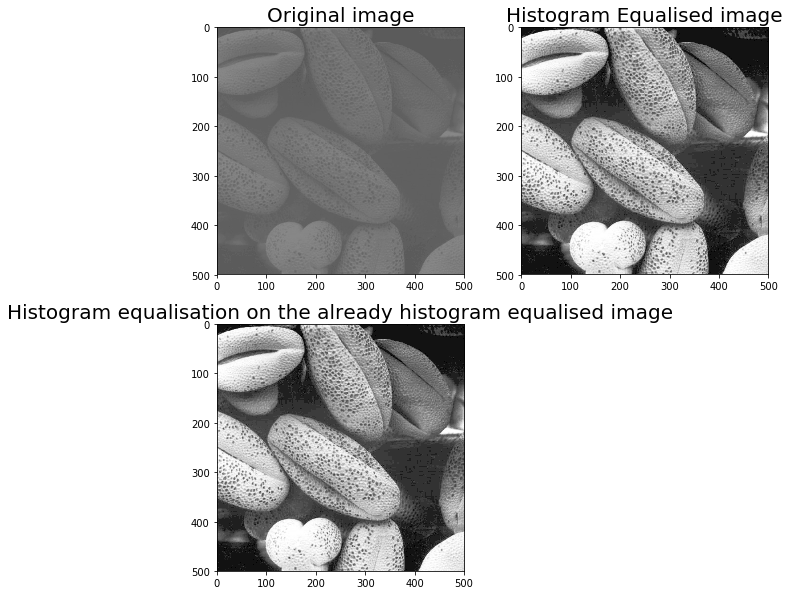

In [8]:
img = cv2.imread('../input_data/c1.jpg', cv2.IMREAD_GRAYSCALE)
images = []
subtitles = []
images.append(img)
subtitles.append('Original image')
hist_equalised = histEqualization(img, 256)
images.append(hist_equalised)
subtitles.append('Histogram Equalised image')
images.append(histEqualization(hist_equalised, 256))
subtitles.append('Histogram equalisation on the already histogram equalised image')
display_images(images, 2, 2, (10, 10), 'title', subtitles)

Observation: No change is observed between the histogram equalised image and the image in which histogram equalisation was applied successively!<br> This is according to what we expect. <br> If an image has an almost equal distribution of number of pixels with certain intensity then histogram equalisation cannot do anything else!

### Part 2

In [9]:
# Helper function required to solve this part
def histMatching(im, ref_im):
    img_rs = histEqualization(im, 256)
    sz = (ref_im.shape[0] * ref_im.shape[1])
    cum_prob = np.zeros(256)
    for i in range(256):
        cum_prob[i] = sum(sum((ref_im <= i))) * 1.0 / sz
    img_rs = img_rs / 255
    res = np.searchsorted(cum_prob, img_rs)
    return res.astype(np.uint8)

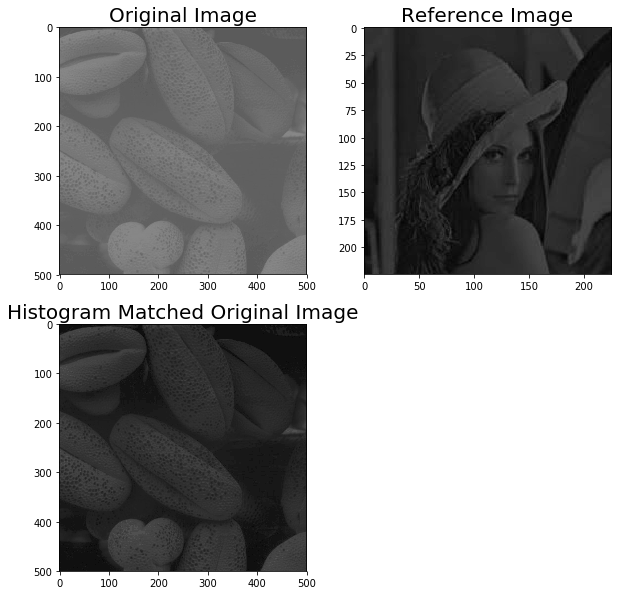

In [10]:
# Light -> Dark Image
img = cv2.imread('../input_data/c1.jpg', cv2.IMREAD_GRAYSCALE)
ref = cv2.imread('../input_data/c2.jpg', cv2.IMREAD_GRAYSCALE)
images = []
subtitles = []
images.append(img)
images.append(ref)
subtitles.append('Original Image')
subtitles.append('Reference Image')
images.append(histMatching(img, ref))
subtitles.append('Histogram Matched Original Image')
display_images(images, 2, 2, (10, 10), 'title', subtitles)

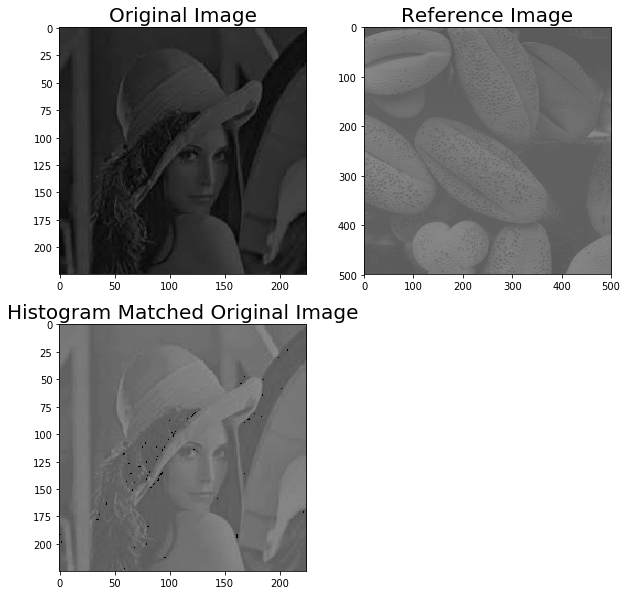

In [11]:
# Dark -> Light image
img = cv2.imread('../input_data/c2.jpg', cv2.IMREAD_GRAYSCALE)
ref = cv2.imread('../input_data/c1.jpg', cv2.IMREAD_GRAYSCALE)
images = []
subtitles = []
images.append(img)
images.append(ref)
subtitles.append('Original Image')
subtitles.append('Reference Image')
images.append(histMatching(img, ref))
subtitles.append('Histogram Matched Original Image')
display_images(images, 2, 2, (10, 10), 'title', subtitles)

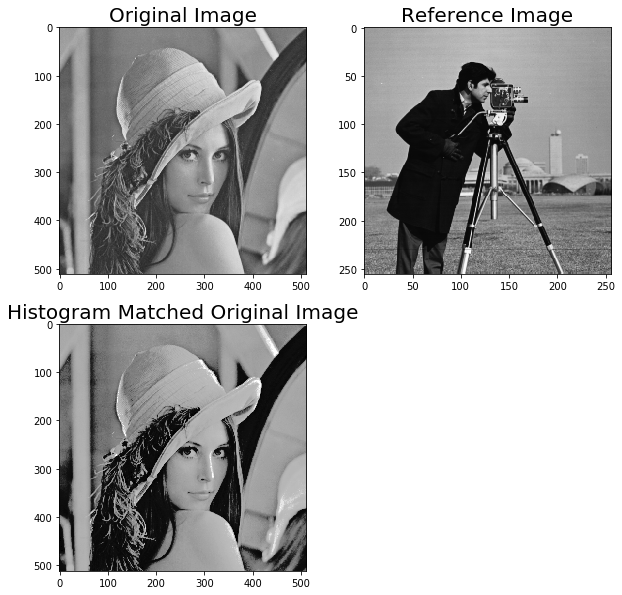

In [12]:
# Similar histograms
img = cv2.imread('../input_data/lena.jpg', cv2.IMREAD_GRAYSCALE)
ref = cv2.imread('../input_data/cameraman.png', cv2.IMREAD_GRAYSCALE)
images = []
subtitles = []
images.append(img)
images.append(ref)
subtitles.append('Original Image')
subtitles.append('Reference Image')
images.append(histMatching(img, ref))
subtitles.append('Histogram Matched Original Image')
display_images(images, 2, 2, (10, 10), 'title', subtitles)